In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df= pd.read_csv('/content/forbes_2022_billionaires.csv')
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
df.tail()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
2663,2578,Zhang Yuqiang,66.0,1000.0,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,1955-09-01,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000.0,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,1963-03-01,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000.0,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,1965-03-06,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000.0,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,1978-07-11,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN
2667,2578,Zhuang Kuilong & family,59.0,1000.0,2022,4,Manufacturing,polyester,China,NaN,...,NaN,True,M,1962-06-15,NaN,NaN,NaN,NaN,"Zhuang Kuilong chairs Xinfengming Group, a man...",NaN


In [4]:
df['finalWorth'].value_counts()

1500.0      147
1300.0      134
1100.0      130
1200.0      124
1400.0      114
           ... 
17900.0       1
17800.0       1
17400.0       1
17300.0       1
219000.0      1
Name: finalWorth, Length: 228, dtype: int64

In [5]:
df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [6]:
df.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings
count,2668.000000,2582.000000,2668.000000,2668.0,2668.0,396.000000,127.000000
mean,1302.919040,64.210689,4762.350075,2022.0,4.0,1.856061,2.732283
std,747.807782,13.401258,10540.482258,0.0,0.0,0.971486,1.891706
min,1.000000,19.000000,1000.000000,2022.0,4.0,1.000000,1.000000
25%,665.000000,55.000000,1500.000000,2022.0,4.0,1.000000,2.000000
50%,1292.000000,64.000000,2400.000000,2022.0,4.0,2.000000,2.000000
75%,1929.000000,74.000000,4300.000000,2022.0,4.0,2.000000,3.000000
max,2578.000000,100.000000,219000.000000,2022.0,4.0,5.000000,14.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rank                  2668 non-null   int64  
 1   personName            2668 non-null   object 
 2   age                   2582 non-null   float64
 3   finalWorth            2668 non-null   float64
 4   year                  2668 non-null   int64  
 5   month                 2668 non-null   int64  
 6   category              2668 non-null   object 
 7   source                2668 non-null   object 
 8   country               2655 non-null   object 
 9   state                 748 non-null    object 
 10  city                  2624 non-null   object 
 11  countryOfCitizenship  2668 non-null   object 
 12  organization          352 non-null    object 
 13  selfMade              2668 non-null   bool   
 14  gender                2652 non-null   object 
 15  birthDate            

In [8]:
df.isnull().sum()

rank                       0
personName                 0
age                       86
finalWorth                 0
year                       0
month                      0
category                   0
source                     0
country                   13
state                   1920
city                      44
countryOfCitizenship       0
organization            2316
selfMade                   0
gender                    16
birthDate                 99
title                   2267
philanthropyScore       2272
residenceMsa            2029
numberOfSiblings        2541
bio                        0
about                   1106
dtype: int64

Our data has so many null values so must drop it first

In [9]:
df = df.drop(columns = ["state", "organization" , "title","philanthropyScore","residenceMsa","numberOfSiblings","about"] )

In [10]:
df = df.dropna()
df.isnull().sum()

rank                    0
personName              0
age                     0
finalWorth              0
year                    0
month                   0
category                0
source                  0
country                 0
city                    0
countryOfCitizenship    0
selfMade                0
gender                  0
birthDate               0
bio                     0
dtype: int64

Finally , There is no null values anymore

In [14]:
df["selfMade"] = df["selfMade"].astype(int)

In [15]:
transfered_df = df.select_dtypes(include=["int64", "float64"])

In [18]:
#applying the minmax Scaler
mm = MinMaxScaler()
df1 = pd.DataFrame(mm.fit_transform(transfered_df))
df1.columns = transfered_df.columns
df1.index = transfered_df.index

In [19]:
df

,rank,personName,age,finalWorth,year,month,category,source,country,city,countryOfCitizenship,selfMade,gender,birthDate,bio
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Austin,United States,1,M,1971-06-28,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Seattle,United States,1,M,1964-01-12,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,Paris,France,0,M,1949-03-05,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Medina,United States,1,M,1955-10-28,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Omaha,United States,1,M,1930-08-30,"Known as the ""Oracle of Omaha,"" Warren Buffett..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,66.0,1000.0,2022,4,Manufacturing,Fiberglass,China,Tongxiang,China,1,M,1955-09-01,"Zhang Yuqiang chairs Zhenshi Holding Group, a ..."
2664,2578,Zhou Ruxin,59.0,1000.0,2022,4,Technology,Navigation,China,Beijing,China,1,M,1963-03-01,"Zhou Ruxin chairs Beijing BDStar Navigation, a..."
2665,2578,Wen Zhou & family,57.0,1000.0,2022,4,Manufacturing,chemicals,China,Shanghai,China,1,M,1965-03-06,"Zhou Wen chairs Shanghai Pret Composites, a su..."
2666,2578,Zhou Yifeng & family,43.0,1000.0,2022,4,Energy,liquefied petroleum gas,China,Zhangjiagang,China,1,F,1978-07-11,Zhou Yifeng chairs Shenzhen-listed Oriental En...


In [23]:
x = df1.drop(["selfMade"],axis = 1)
y = df1['selfMade']

In [24]:
smote = SMOTE(sampling_strategy="minority")
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

1.0    1818
0.0    1818
Name: selfMade, dtype: int64

In [31]:
best_feat = SelectKBest(score_func = chi2,k=3 )
fit = best_feat.fit(x_sm,y_sm)

In [32]:
df_scores = pd.DataFrame(fit.scores_)
df_scores

,0
0,5.050075
1,2.372150
2,0.685928
3,NaN
4,NaN


In [33]:
dfcolumns = pd.DataFrame(x.columns)
dfcolumns

,0
0,rank
1,age
2,finalWorth
3,year
4,month


In [34]:
final_df = pd.concat([dfcolumns, df_scores], axis = 1)
final_df.columns = ["Feature" , "Score"]
final_df.sort_values(by=["Score"], inplace=True, ascending=False)
final_df

,Feature,Score
0,rank,5.050075
1,age,2.372150
2,finalWorth,0.685928
3,year,NaN
4,month,NaN


Text(0, 0.5, ' NAME')

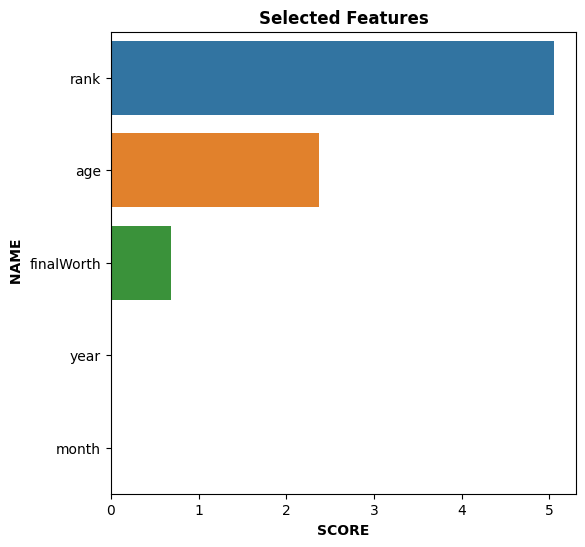

In [38]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=final_df['Score'].head(20),y=final_df['Feature'].head(7))
plt.title('Selected Features', weight ='bold')
plt.xlabel('SCORE', weight ='bold')
plt.ylabel(' NAME', weight ='bold')

In [35]:
#creating the hyperparameter grid
c_space = np.logspace(-5,8,17)
param_grid = {'C':c_space}
print(type(param_grid))

<class 'dict'>


In [39]:
c_space

array([1.00000000e-05, 6.49381632e-05, 4.21696503e-04, 2.73841963e-03,
       1.77827941e-02, 1.15478198e-01, 7.49894209e-01, 4.86967525e+00,
       3.16227766e+01, 2.05352503e+02, 1.33352143e+03, 8.65964323e+03,
       5.62341325e+04, 3.65174127e+05, 2.37137371e+06, 1.53992653e+07,
       1.00000000e+08])

In [40]:
#instantiating logistic regression classifier
logreg = LogisticRegression()

In [41]:
#instantiating GridSearchCV object
logreg_cv = GridSearchCV(logreg , param_grid , cv = 5)
#cv int,cross-validation Generator or an iterable , default=None
logreg_cv.fit(x_sm,y_sm)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 6.49381632e-05, 4.21696503e-04, 2.73841963e-03,
       1.77827941e-02, 1.15478198e-01, 7.49894209e-01, 4.86967525e+00,
       3.16227766e+01, 2.05352503e+02, 1.33352143e+03, 8.65964323e+03,
       5.62341325e+04, 3.65174127e+05, 2.37137371e+06, 1.53992653e+07,
       1.00000000e+08])})

In [42]:
#Print the tuned parameters and score
print("Tuned Logistric regression Parameters : {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistric regression Parameters : {'C': 1e-05}
Best score is 0.46016218994210745


In [44]:
#crteating the hyperparameter grid
param_dist = {"max_depth": [3,None],
            "max_features": randint(1,9),
            "min_samples_leaf" : randint(1,9),
            "criterion" : ["gini", "entropy"]}

In [45]:
##instantiating Decision Tree Class
tree = DecisionTreeClassifier()

In [46]:
#instantiating Decision Tree Class
tree_cv = RandomizedSearchCV(tree, param_dist , cv=5)
tree_cv.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7edcc97fab00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7edcc9797820>})

In [47]:
#Print the tuned parameters and score
print("Tuned Logistric regression Parameters : {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Logistric regression Parameters : {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2}
Best score is 0.3688143355956286
